In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from collections import Counter
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load CSV files into separate DataFrames
db1 = pd.read_csv('caltech_clean.csv')
db2 = pd.read_csv('jpl_clean.csv')
db3 = pd.read_csv('office1_clean.csv')

# Combine them using concat
db = pd.concat([db1, db2, db3], ignore_index=True)
db.head()

,Unnamed: 0,connectionTime,disconnectTime,siteID,spaceID,userID,userInputs/0/WhPerMile,userInputs/0/kWhRequested,userInputs/0/milesRequested,userInputs/0/minutesAvailable,userInputs/0/modifiedAt,userInputs/0/paymentRequired,userInputs/0/requestedDeparture
0,0,7.187222,15.451667,2,315,743.0,400.0,8.00,20.0,30.0,7.191944,1.0,7.687222
1,1,7.718056,23.609722,2,316,4269.0,400.0,16.00,40.0,60.0,7.865000,1.0,8.718056
2,2,7.867222,20.912778,2,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,8.414444,19.320833,2,323,3853.0,360.0,21.60,60.0,559.0,8.418889,1.0,17.731111
4,4,8.984722,23.126944,2,492,1470.0,292.0,20.44,70.0,400.0,8.990556,1.0,15.651389


In [5]:
X = db[["connectionTime", "siteID", "spaceID"]].values
X

y = db['disconnectTime'].values
y

#splitting dataset into train, validation and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state = 0)

# Scale data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
train_linreg = LinearRegression().fit(X_train, y_train)

# Train a Neural Network (MLPClassifier)
train_nn = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, random_state=0)
train_nn.fit(X_train, y_train)

# Predictions for Logistic Regression
pred_linreg = train_linreg.predict(X_val)
print("For Linear Regression: ")
print("Mean Squared Error (MSE):", mean_squared_error(y_val, pred_linreg))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_val, pred_linreg))
print("R² Score:", r2_score(y_val, pred_linreg))

# Predictions for Neural Network
pred_nn = train_nn.predict(X_val)
print("For Neural Network: ")
print("Mean Squared Error (MSE):", mean_squared_error(y_val, pred_nn))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_val, pred_nn))
print("R² Score:", r2_score(y_val, pred_nn))

For Linear Regression: 
Mean Squared Error (MSE): 84.06910214068587
Mean Absolute Error (MAE): 8.398832316587399
R² Score: 0.09286316201464784
For Neural Network: 
Mean Squared Error (MSE): 80.2271519954437
Mean Absolute Error (MAE): 7.932056966164251
R² Score: 0.1343192311019572


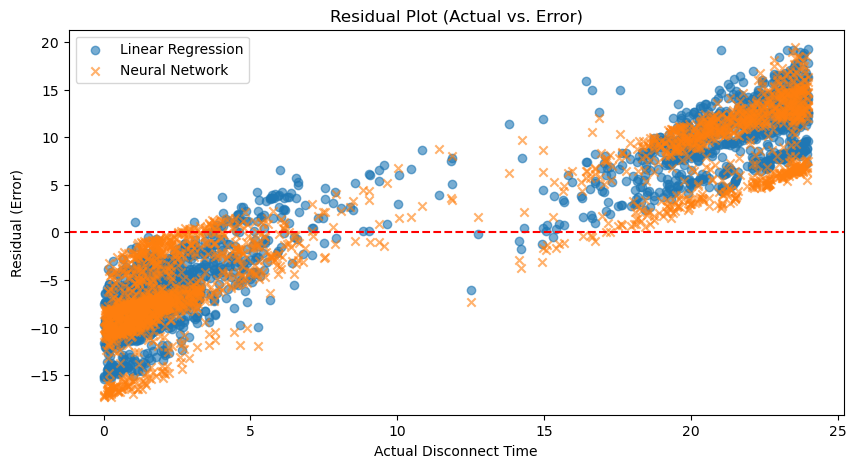

In [6]:
# Residuals (errors)
residuals_linreg = y_val - pred_linreg
residuals_nn = y_val - pred_nn

plt.figure(figsize=(10, 5))

plt.scatter(y_val, residuals_linreg, label="Linear Regression", alpha=0.6)
plt.scatter(y_val, residuals_nn, label="Neural Network", alpha=0.6, marker='x')

plt.axhline(y=0, color='red', linestyle='dashed')  # Perfect prediction line

plt.xlabel("Actual Disconnect Time")
plt.ylabel("Residual (Error)")
plt.title("Residual Plot (Actual vs. Error)")
plt.legend()
plt.show()

In [7]:
db_cleaned = db.dropna()
db_cleaned.head()

,Unnamed: 0,connectionTime,disconnectTime,siteID,spaceID,userID,userInputs/0/WhPerMile,userInputs/0/kWhRequested,userInputs/0/milesRequested,userInputs/0/minutesAvailable,userInputs/0/modifiedAt,userInputs/0/paymentRequired,userInputs/0/requestedDeparture
0,0,7.187222,15.451667,2,315,743.0,400.0,8.00,20.0,30.0,7.191944,1.0,7.687222
1,1,7.718056,23.609722,2,316,4269.0,400.0,16.00,40.0,60.0,7.865000,1.0,8.718056
3,3,8.414444,19.320833,2,323,3853.0,360.0,21.60,60.0,559.0,8.418889,1.0,17.731111
4,4,8.984722,23.126944,2,492,1470.0,292.0,20.44,70.0,400.0,8.990556,1.0,15.651389
5,5,9.014167,1.164722,2,321,891.0,400.0,8.00,20.0,36.0,9.014722,1.0,9.614167


In [8]:
X2 = db_cleaned[["connectionTime", "siteID", "spaceID", "userID", "userInputs/0/WhPerMile", 
          "userInputs/0/kWhRequested", "userInputs/0/milesRequested", 
          "userInputs/0/minutesAvailable", "userInputs/0/modifiedAt", 
          "userInputs/0/paymentRequired", "userInputs/0/requestedDeparture"]].values
X2

y2 = db_cleaned['disconnectTime'].values
y2

#splitting dataset into train, validation and test data
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state = 0)
X2_train,X2_val,y2_train,y2_val = train_test_split(X2_train,y2_train,test_size=0.25,random_state = 0)

# Scale data
scaler = StandardScaler().fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_val = scaler.transform(X2_val)
X2_test = scaler.transform(X2_test)

# Train Logistic Regression model
train_linreg2 = LinearRegression().fit(X2_train, y2_train)

# Train a Neural Network (MLPClassifier)
train_nn2 = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, random_state=0)
train_nn2.fit(X2_train, y2_train)

# Predictions for Logistic Regression
pred_linreg2 = train_linreg2.predict(X2_val)
print("For Linear Regression: ")
print("Mean Squared Error (MSE):", mean_squared_error(y2_val, pred_linreg2))
print("Mean Absolute Error (MAE):", mean_absolute_error(y2_val, pred_linreg2))
print("R² Score:", r2_score(y2_val, pred_linreg2))

# Predictions for Neural Network
pred_nn2 = train_nn2.predict(X2_val)
print("For Neural Network: ")
print("Mean Squared Error (MSE):", mean_squared_error(y2_val, pred_nn2))
print("Mean Absolute Error (MAE):", mean_absolute_error(y2_val, pred_nn2))
print("R² Score:", r2_score(y2_val, pred_nn2))

For Linear Regression: 
Mean Squared Error (MSE): 83.8649549601781
Mean Absolute Error (MAE): 8.189618351951294
R² Score: 0.11442171129395651
For Neural Network: 
Mean Squared Error (MSE): 74.12999394963315
Mean Absolute Error (MAE): 7.130330636364785
R² Score: 0.21721876301159015


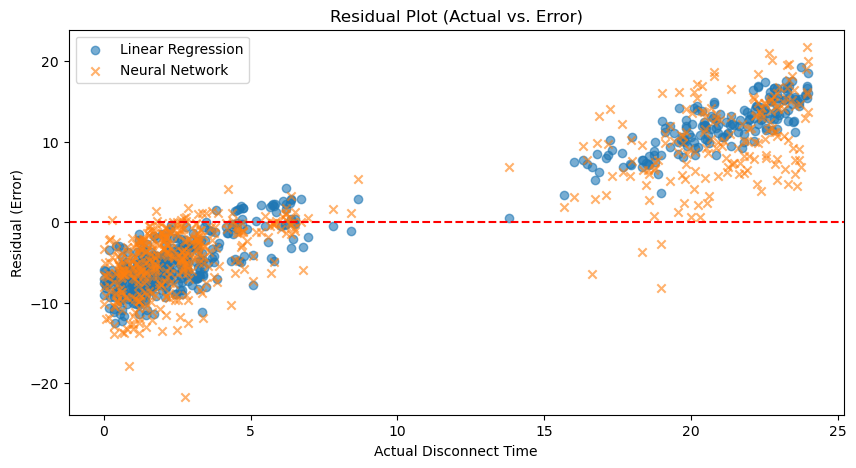

In [41]:
# Residuals (errors)
residuals_linreg2 = y2_val - pred_linreg2
residuals_nn2 = y2_val - pred_nn2

plt.figure(figsize=(10, 5))

plt.scatter(y2_val, residuals_linreg2, label="Linear Regression", alpha=0.6)
plt.scatter(y2_val, residuals_nn2, label="Neural Network", alpha=0.6, marker='x')

plt.axhline(y=0, color='red', linestyle='dashed')  # Perfect prediction line

plt.xlabel("Actual Disconnect Time")
plt.ylabel("Residual (Error)")
plt.title("Residual Plot (Actual vs. Error)")
plt.legend()
plt.show()